# Importing the libraries

In [119]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential  # Sequential class
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import metrics

# Iris Dataset

In [11]:
# Load the Iris Dataset
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


In [14]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [18]:
X = iris['data']   # feature matrix
y = iris['target'] # target labels

In [19]:
X.shape, y.shape

((150, 4), (150,))

In [20]:
X[:5]  # print the 1st 5 rows in X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [23]:
y[5:10], y[51:55], y[105:110]

(array([0, 0, 0, 0, 0]), array([1, 1, 1, 1]), array([2, 2, 2, 2, 2]))

In [25]:
# Covert the labels into Ont-Hot Encodings
y = to_categorical(y, num_classes=3)

In [27]:
y[51:55]  # print the 1st 5 labels

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
X_train.shape, y_train.shape

((112, 4), (112, 3))

In [30]:
(X_train.shape[1], )

(4,)

## Model Building

In [41]:
from keras import backend as K
K.clear_session()

In [42]:
# Define the model
model = Sequential()  # create an instance of the Sequential class

# This is the first Hidden Laeyr
model.add(Dense(4, input_shape=(X_train.shape[1], ), activation='relu')) 

# This is my output layer
model.add(Dense(3, activation='softmax')) 

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
Total params: 35 (140.00 Byte)
Trainable params: 35 (140.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"] ) 

In [66]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 0.1333 - accuracy: 0.9732
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1304 - accuracy: 0.9732
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1291 - accuracy: 0.9732
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1289 - accuracy: 0.9732
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1280 - accuracy: 0.9732
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1282 - accuracy: 0.9732
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1314 - accuracy: 0.9643
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1265 - accuracy: 0.9643
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1238 - accuracy: 0.9732
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1269 - accuracy: 0.9732
Epoch 11/

In [37]:
loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy 

2/2 [==============================] - 0s 7ms/step - loss: 0.5412 - accuracy: 0.9211


(0.5411736369132996, 0.9210526347160339)

In [67]:
model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"] )
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 1s 25ms/step - loss: 0.0951 - accuracy: 0.9732 - val_loss: 0.0964 - val_accuracy: 0.9737
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0915 - accuracy: 0.9732 - val_loss: 0.0949 - val_accuracy: 0.9737
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0947 - accuracy: 0.9732 - val_loss: 0.0950 - val_accuracy: 0.9737
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0922 - accuracy: 0.9732 - val_loss: 0.0947 - val_accuracy: 0.9737
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0959 - accuracy: 0.9732 - val_loss: 0.0978 - val_accuracy: 0.9474
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0924 - accuracy: 0.9732 - val_loss: 0.0954 - val_accuracy: 0.9737
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0926 - accuracy: 0.9732 - val_loss: 0.0942 - val_accuracy: 0.9737
Epoch 8/100


In [68]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [69]:
# %%capture
# !pip install matplotlib

## Model Trianing Plots

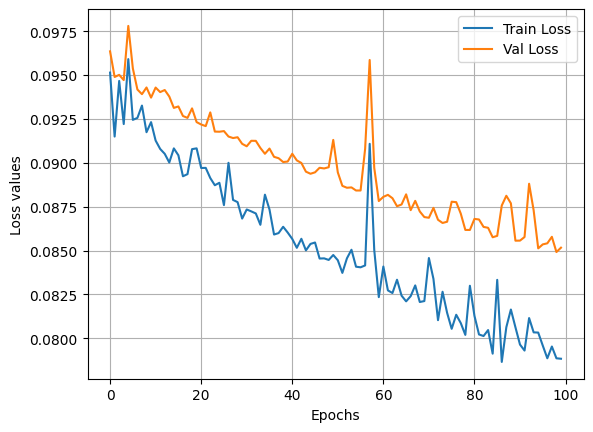

In [70]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss values")
plt.legend()
plt.grid("on")
plt.show()

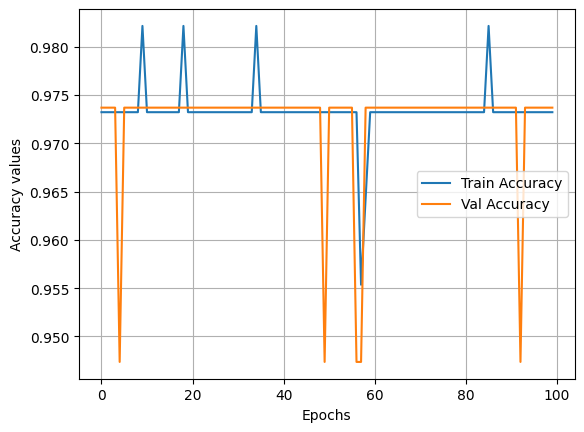

In [71]:
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy values")
plt.legend()
plt.grid("on")
plt.show()

# Churn PRediction Dataset

In [56]:
import pandas as pd

In [57]:
df = pd.read_pickle("cleaned_churn_dataset.pkl")

In [58]:
df.head()

,vintage,age,gender,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,...,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_1,customer_nw_category_2,customer_nw_category_3
0,2401,66,0,0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,...,1458.71,0.0,0,0,0,1,0,0,1,0
1,2648,35,0,0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,...,8787.61,0.0,0,0,0,1,0,0,1,0
2,2494,31,0,0,3913.16,5815.29,4910.17,2815.94,0.61,0.61,...,5070.14,0.0,0,0,1,0,0,0,1,0
3,2629,90,0,1,2291.91,2291.91,2084.54,1006.54,0.47,0.47,...,1669.79,1.0,0,0,0,1,0,0,1,0
4,1879,42,0,2,927.72,1401.72,1643.31,1871.12,0.33,714.61,...,1677.16,1.0,0,0,0,1,0,0,0,1


In [73]:
X = df.drop("churn", axis=1)
y = df["churn"]

In [75]:
X.shape, y.shape

((15929, 22), (15929,))

In [83]:
df["churn"].value_counts(normalize=True)

churn
0.0    0.81248
1.0    0.18752
Name: proportion, dtype: float64

## Model Building

In [127]:
from keras import backend as K
K.clear_session()

model = Sequential()  # create an instance of the Sequential class

model.add(Dense(256, input_shape=(X.shape[1], ), activation='relu', kernel_regularizer="l1")) 
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu', kernel_regularizer="l1"))  
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu', kernel_regularizer="l1")) 

# This is my output layer
model.add(Dense(1, activation='sigmoid')) 

In [128]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5888      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 55425 (216.50 KB)
Trainable params: 55425 

In [129]:
model.compile(optimizer = "adam", loss="binary_crossentropy", metrics=metrics.AUC() )
history = model.fit(X, y, epochs=60, batch_size=100, validation_split=0.2)

Epoch 1/60
128/128 [==============================] - 5s 10ms/step - loss: 122.8190 - auc: 0.6263 - val_loss: 74.5128 - val_auc: 0.6194
Epoch 2/60
128/128 [==============================] - 1s 8ms/step - loss: 80.4153 - auc: 0.6210 - val_loss: 61.2406 - val_auc: 0.6441
Epoch 3/60
128/128 [==============================] - 1s 6ms/step - loss: 67.3718 - auc: 0.6340 - val_loss: 56.6655 - val_auc: 0.6163
Epoch 4/60
128/128 [==============================] - 1s 6ms/step - loss: 55.4015 - auc: 0.6122 - val_loss: 37.1067 - val_auc: 0.6657
Epoch 5/60
128/128 [==============================] - 1s 6ms/step - loss: 47.8237 - auc: 0.5959 - val_loss: 37.6819 - val_auc: 0.5061
Epoch 6/60
128/128 [==============================] - 1s 6ms/step - loss: 39.3678 - auc: 0.5536 - val_loss: 32.6179 - val_auc: 0.5250
Epoch 7/60
128/128 [==============================] - 1s 7ms/step - loss: 34.5909 - auc: 0.5527 - val_loss: 30.7852 - val_auc: 0.5123
Epoch 8/60
128/128 [==============================] - 1s 7ms

## Model Plots

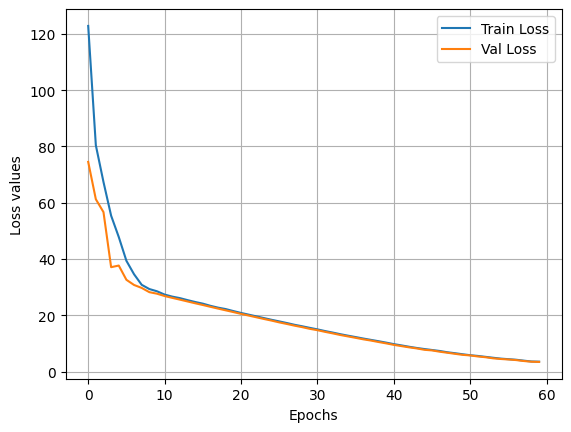

In [130]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss values")
plt.legend()
plt.grid("on")
plt.show()

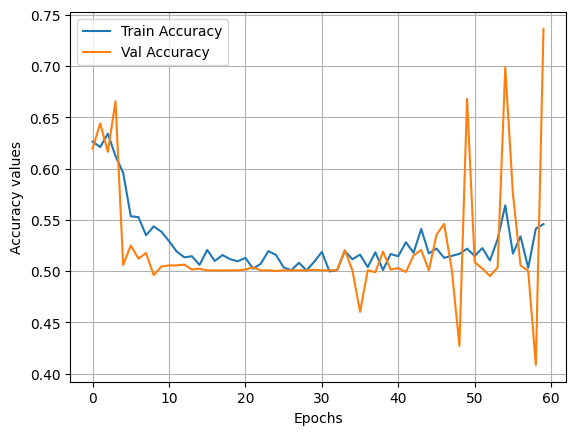

In [131]:
plt.plot(history.history["auc"], label = "Train Accuracy")
plt.plot(history.history["val_auc"], label = "Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy values")
plt.legend()
plt.grid("on")
plt.show()

In [115]:
history.history.keys()

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])

In [132]:
# !pip install keras-tuner

   ---------------------------------------- 0.0/128.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/128.9 kB ? eta -:--:--
   ------------------ -------------------- 61.4/128.9 kB 656.4 kB/s eta 0:00:01
   --------------------------- ----------- 92.2/128.9 kB 655.4 kB/s eta 0:00:01
   --------------------------------- ---- 112.6/128.9 kB 656.4 kB/s eta 0:00:01
   --------------------------------- ---- 112.6/128.9 kB 656.4 kB/s eta 0:00:01
   --------------------------------- ---- 112.6/128.9 kB 656.4 kB/s eta 0:00:01
   --------------------------------- ---- 112.6/128.9 kB 656.4 kB/s eta 0:00:01
   --------------------------------- ---- 112.6/128.9 kB 656.4 kB/s eta 0:00:01
   --------------------------------- ---- 112.6/128.9 kB 656.4 kB/s eta 0:00:01
   -------------------------------------- 128.9/128.9 kB 262.0 kB/s eta 0:00:00
